# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Python Installation**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Modern Portfolio Theory on Multiple Assets
In this notebook, we provide a model solution to implement the Modern Portfolio Theorem (MPT) on multiple assets. You can refer to this if you are stuck in any step while building your capstone project solution. The model solution here guides you to answer the problem statements posed in the capstone project. The notebook structure is as follows:

1. [Import the data and calculate annualised returns](#data): You already know this from the MPT notebook on two assets.

1. [Make random portfolios with different weights](#weights): Create a portfolio with random weights of the constituents. The portfolio metrics is calculated and saved in a data frame.

1. [Identify the portfolios with maximum returns/risk and minimum risk](#max): The portfolios with minimum risk and maximum Sharpe ratio (returns/risk) is selected from the list of random portfolios.

1. [Efficient frontier](#frontier): The efficient frontier is plotted for a visual representation of the various portfolios.

1. [Results](#opt_wt): The optimal weights are printed for the portfolios with minimum risk and maximum Sharpe ratio.

In [1]:
# Importing the necessary Python modules required in this notebook 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

<a id='data'></a> 
## Import the data and calculate annualised returns
We have imported and saved the prices of the stocks, Chevron (CVX), Microsoft (MSFT) and Google (GOOGL) in a CSV file. You will read the CSV file and save in a dataframe.

You can use your own data file with more assets coming in as additional columns.

In [2]:
# Read CSV to get the prices
stock_prices = pd.read_csv("/Applications/Study/UW Madison/UW Madison courses/STAT 479/R code/stock.csv",index_col=0)
stock_prices

,index,ticker,Date,Open,High,Low,Close,Adj Close,Volume,EFFR
0,0,XLE,2000-07-03,30.187500,30.640625,30.187500,30.531250,17.919563,54000,7.03
1,1,XLE,2000-07-05,30.000000,30.109375,29.250000,29.265625,17.176744,1032400,6.52
2,2,XLE,2000-07-06,29.687500,30.125000,29.562500,29.562500,17.350986,217800,6.51
3,3,XLE,2000-07-07,29.812500,29.906250,29.625000,29.703125,17.433531,522000,6.42
4,4,XLE,2000-07-10,29.687500,30.109375,29.687500,29.843750,17.516054,173300,6.51
...,...,...,...,...,...,...,...,...,...,...
66198,3932,XME,2022-02-03,43.750000,44.830002,43.610001,43.820000,43.820000,4201400,0.08
66199,3933,XME,2022-02-04,43.750000,44.750000,43.660000,44.259998,44.259998,4290700,0.08
66200,3934,XME,2022-02-07,44.500000,44.970001,43.980000,44.570000,44.570000,4307600,0.08
66201,3935,XME,2022-02-08,44.759998,46.389999,44.759998,46.310001,46.310001,4683300,0.08


In [3]:
stock_prices_1=stock_prices.pivot_table(index=['Date'],columns=['ticker'],values=['Close'])
#2017-01-03 to 2020-02-03
period = (stock_prices_1[1] > '2017-01-03') & (stock_prices_1[1] <= '2017-01-03')
period

KeyError: 1

In [4]:
stock_prices_1

Close                                               \
ticker            GDX         IYR        XLB        XLE        XLF   
Date                                                                 
2000-07-03        NaN   35.578125  20.187500  30.531250  19.648661   
2000-07-05        NaN   35.906250  20.281250  29.265625  19.864439   
2000-07-06        NaN   36.015625  19.750000  29.562500  20.016754   
2000-07-07        NaN   36.281250  19.656250  29.703125  20.359465   
2000-07-10        NaN   36.250000  19.937500  29.843750  20.410236   
...               ...         ...        ...        ...        ...   
2022-02-03  30.250000  106.110001  84.519997  67.839996  39.430000   
2022-02-04  30.400000  105.129997  83.120003  68.900002  40.099998   
2022-02-07  31.299999  104.949997  82.709999  69.779999  40.220001   
2022-02-08  31.650000  104.400002  83.989998  68.279999  40.779999   
2022-02-09  31.590000  106.790001  85.820000  68.849998  41.040001   

                                                                      \
ticker             XLI         XLK        XLP        XLU         XLV   
Date                                                                   
2000-07-03   28.656250   54.562500  25.281250  28.062500   29.500000   
2000-07-05   28.406250   52.812500  25.343750  28.312500   29.687500   
2000-07-06   28.328125   53.625000  25.375000  28.343750   29.625000   
2000-07-07   28.468750   54.500000  25.203125  28.640625   29.875000   
2000-07-10   28.500000   53.906250  25.437500  28.640625   29.625000   
...                ...         ...        ...        ...         ...   
2022-02-03  101.199997  158.960007  76.830002  69.029999  132.779999   
2022-02-04  100.110001  159.600006  75.889999  68.480003  132.300003   
2022-02-07  100.190002  158.539993  76.029999  68.379997  132.070007   
2022-02-08  101.190002  160.500000  76.320000  68.430000  133.149994   
2022-02-09  102.580002  164.059998  76.339996  68.730003  134.179993   

                                               
ticker             XLY        XME         XOP  
Date                                           
2000-07-03   25.937500        NaN         NaN  
2000-07-05   26.250000        NaN         NaN  
2000-07-06   26.437500        NaN         NaN  
2000-07-07   27.718750        NaN         NaN  
2000-07-10   28.125000        NaN         NaN  
...                ...        ...         ...  
2022-02-03  179.300003  43.820000  110.209999  
2022-02-04  184.399994  44.259998  111.919998  
2022-02-07  184.020004  44.570000  111.220001  
2022-02-08  186.610001  46.310001  107.739998  
2022-02-09  189.080002  47.349998  109.949997  

[5437 rows x 13 columns]

In [8]:
stock_prices_1 = stock_prices_1.reset_index().rename_axis(None, axis=0)


In [11]:
stock_prices_1
print(stock_prices_1.index.name)

None


In [7]:

# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) \
                   + 1)**(252/len(stock_prices)) - 1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<a id='weights'></a> 
## Make random portfolios with different weights

Let's generate 1000 portfolios with different percentage of allocations for the constituents. You will calculate portfolio returns and portfolio standard deviation for all the portfolios and save it into the dataframe `portfolio`. The weight allocation is saved in the list named `weights_array`.

The number 1000 is just for an example here and can be increased if you want.

In [3]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 1000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * annual_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

<a id='max'></a> 
## Identify the portfolios with maximum returns/risk and minimum risk

Let's identify the portfolio with maximum returns/standard deviation. We will also identify the portfolio with the minimum standard deviation.

In [4]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

<a id='frontier'></a>
## Efficient frontier

We will plot all the 1000 portfolios in a graph with portfolio standard deviation on the X-axis and portfolio returns on the Y-axis. The curve generated is known as the <b>Efficient Frontier</b>

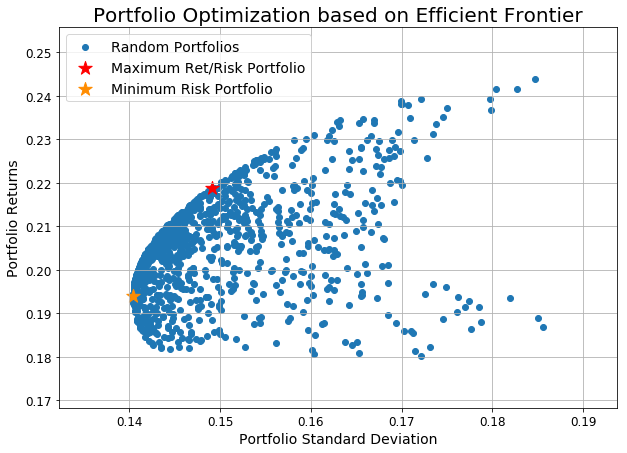

In [5]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

<a id='opt_wt'></a> 
## Results

You have saved the weights also while creating the portfolios. You can now get the optimal weights of the portfolio with maximum returns/standard deviation value.

### Portfolio with maximum Sharpe ratio (returns/standard deviation)

In [6]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.218845
std_dev            0.149160
returns/std_dev    1.467179
Name: 365, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
CVX 34.5%
GOOGL 13.26%
MSFT 52.24%


### Portfolio with minimum risk

In [7]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.194054
std_dev            0.140427
returns/std_dev    1.381886
Name: 286, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
CVX 40.86%
GOOGL 42.24%
MSFT 16.89%


## Conclusion

The minimum risk portfolio assigns lesser weight to `MSFT` and more to `GOOGL`. The weight distribution is reversed in the portfolio with the maximum Sharpe ratio. This increase in weight of `MSFT` for the minimum risk porfolio indicates that `MSFT` is a safer investment for this data period. Similarly, `GOOGL` is a comparatively risky investment when compared to `MSFT`.

The MPT is thus implemented on multiple assets. You can try using this code on more stocks if you like with the additional assets coming in as additional columns.